In [ ]:
# acess google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# change  directory
%cd '/content/drive/MyDrive/Portopolio/Sentimen Analysis/data-lazada'

/content/drive/MyDrive/Portopolio/Sentimen Analysis/data-lazada


In [3]:
!ls

20191002-items.csv  20191002-reviews.csv  categories.txt


In [4]:
# install library
!pip install plotly
!pip install wordcloud
!pip install Sastrawi

In [5]:
# import library
import pandas as pd
import numpy as np
import re

# visualization
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

# preprocessing
from collections import OrderedDict

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from datetime import datetime

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# encoder
from sklearn.preprocessing import LabelEncoder

# split data
from sklearn.model_selection import train_test_split

# feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

# modeling
from sklearn.svm import SVC

# evaluation model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
# read data
data = pd.read_csv('/content/drive/MyDrive/Portopolio/Sentimen Analysis/data/data-lazada/20191002-reviews.csv')

data

itemId                 category             name  rating  \
0       100002528  beli-harddisk-eksternal         Kamal U.       5   
1       100002528  beli-harddisk-eksternal       yofanca m.       4   
2       100002528  beli-harddisk-eksternal  Lazada Customer       5   
3       100002528  beli-harddisk-eksternal  Lazada Customer       4   
4       100002528  beli-harddisk-eksternal         Yosep M.       5   
...           ...                      ...              ...     ...   
203782    9467899    shop-televisi-digital    Isharyanto S.       5   
203783    9467899    shop-televisi-digital         FIRLY B.       3   
203784    9548087    shop-televisi-digital          soni s.       5   
203785    9548767    shop-televisi-digital     Saidhusin H.       3   
203786    9548767    shop-televisi-digital         Vivan Y.       5   

        originalRating                                  reviewTitle  \
0                  NaN                                          NaN   
1                  NaN                                          NaN   
2                  NaN  ok mantaaapppp barang sesuai pesanan.. good   
3                  NaN                                          NaN   
4                  NaN                                          NaN   
...                ...                                          ...   
203782             NaN                                        murah   
203783             NaN              barang bagus dan sesuai pesanan   
203784             NaN                                          NaN   
203785             NaN                                 AKARI LED TV   
203786             NaN                                      TOP DAH   

                                            reviewContent  likeCount  upVotes  \
0                         bagus  mantap dah sesui pesanan          0        0   
1                                      Bagus, sesuai foto          0        0   
2                        okkkkk mantaaaaaaapppp ... goood          0        0   
3                                            bagus sesuai          0        0   
4                                                     NaN          0        0   
...                                                   ...        ...      ...   
203782               barang bagus dengan harga kompetitif          6        6   
203783                                                NaN          0        0   
203784                                                NaN          0        0   
203785  Ok.thank lazada Pagi order sore barang nyampe ...          0        0   
203786  semua fitur berfungsi,harganya cukup murah. AK...          0        0   

        downVotes  helpful  relevanceScore   boughtDate  clientType  \
0               0     True           26.51  09 Apr 2019  androidApp   
1               0     True           22.49  24 Sep 2017  androidApp   
2               0     True           21.50  04 Apr 2018  androidApp   
3               0     True           20.51  22 Sep 2017  androidApp   
4               0     True           16.01  17 Agu 2018  androidApp   
...           ...      ...             ...          ...         ...   
203782          0     True           24.63  22 Nov 2016     desktop   
203783          0     True           14.01  10 Apr 2018  androidApp   
203784          0     True           15.63  04 Jan 2018  androidApp   
203785          0     True           19.48  15 Nov 2016  mobile-app   
203786          0     True            9.50          NaN  mobile-app   

       retrievedDate  
0         2019-10-02  
1         2019-10-02  
2         2019-10-02  
3         2019-10-02  
4         2019-10-02  
...              ...  
203782    2019-10-02  
203783    2019-10-02  
203784    2019-10-02  
203785    2019-10-02  
203786    2019-10-02  

[203787 rows x 15 columns]

In [7]:
# show information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203787 entries, 0 to 203786
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   itemId          203787 non-null  int64  
 1   category        203787 non-null  object 
 2   name            203787 non-null  object 
 3   rating          203787 non-null  int64  
 4   originalRating  8 non-null       float64
 5   reviewTitle     23399 non-null   object 
 6   reviewContent   107029 non-null  object 
 7   likeCount       203787 non-null  int64  
 8   upVotes         203787 non-null  int64  
 9   downVotes       203787 non-null  int64  
 10  helpful         203787 non-null  bool   
 11  relevanceScore  203787 non-null  float64
 12  boughtDate      196680 non-null  object 
 13  clientType      203787 non-null  object 
 14  retrievedDate   203787 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 22.0+ MB


# Preprocessing

In [8]:
# select the necessary columns
df = data[['category', 'name', 'rating', 'reviewTitle', 'reviewContent']]
df

category             name  rating  \
0       beli-harddisk-eksternal         Kamal U.       5   
1       beli-harddisk-eksternal       yofanca m.       4   
2       beli-harddisk-eksternal  Lazada Customer       5   
3       beli-harddisk-eksternal  Lazada Customer       4   
4       beli-harddisk-eksternal         Yosep M.       5   
...                         ...              ...     ...   
203782    shop-televisi-digital    Isharyanto S.       5   
203783    shop-televisi-digital         FIRLY B.       3   
203784    shop-televisi-digital          soni s.       5   
203785    shop-televisi-digital     Saidhusin H.       3   
203786    shop-televisi-digital         Vivan Y.       5   

                                        reviewTitle  \
0                                               NaN   
1                                               NaN   
2       ok mantaaapppp barang sesuai pesanan.. good   
3                                               NaN   
4                                               NaN   
...                                             ...   
203782                                        murah   
203783              barang bagus dan sesuai pesanan   
203784                                          NaN   
203785                                 AKARI LED TV   
203786                                      TOP DAH   

                                            reviewContent  
0                         bagus  mantap dah sesui pesanan  
1                                      Bagus, sesuai foto  
2                        okkkkk mantaaaaaaapppp ... goood  
3                                            bagus sesuai  
4                                                     NaN  
...                                                   ...  
203782               barang bagus dengan harga kompetitif  
203783                                                NaN  
203784                                                NaN  
203785  Ok.thank lazada Pagi order sore barang nyampe ...  
203786  semua fitur berfungsi,harganya cukup murah. AK...  

[203787 rows x 5 columns]

In [10]:
# check missing value
df.isnull().sum()

category              0
name                  0
rating                0
reviewTitle      180388
reviewContent     96758
dtype: int64

In [11]:
# drop the missing value
new_data_clean = df.dropna().reset_index(drop=True)

# check missing value
new_data_clean

category             name  rating  \
0      beli-harddisk-eksternal  Lazada Customer       5   
1      beli-harddisk-eksternal        nurfarida       1   
2      beli-harddisk-eksternal         agung p.       5   
3      beli-harddisk-eksternal     Lazada Guest       1   
4      beli-harddisk-eksternal           Yan M.       5   
...                        ...              ...     ...   
21068    shop-televisi-digital           Ririnn       5   
21069    shop-televisi-digital         Frank S.       1   
21070    shop-televisi-digital    Isharyanto S.       5   
21071    shop-televisi-digital     Saidhusin H.       3   
21072    shop-televisi-digital         Vivan Y.       5   

                                             reviewTitle  \
0            ok mantaaapppp barang sesuai pesanan.. good   
1                                 ada pengirimn ntb bima   
2                              Barang bagus sesuai specs   
3                                    Ini cicil pake apa?   
4                         Beli cash sesuai Harga di atas   
...                                                  ...   
21068                                            Orderan   
21069  Wrong Picture in the Article - I got the wrong...   
21070                                              murah   
21071                                       AKARI LED TV   
21072                                            TOP DAH   

                                           reviewContent  
0                       okkkkk mantaaaaaaapppp ... goood  
1                                                   bima  
2      Pesan rabu sore,minggu sore sampe,,barang sesu...  
3             Mau tanya ini cicilnya pake apa ya,cc bkn?  
4                  Apakah TV. Tsb. Suda ada anti gores..  
...                                                  ...  
21068                                             Wkwkwk  
21069  seller incapable to keep his product page clea...  
21070               barang bagus dengan harga kompetitif  
21071  Ok.thank lazada Pagi order sore barang nyampe ...  
21072  semua fitur berfungsi,harganya cukup murah. AK...  

[21073 rows x 5 columns]

In [12]:
# joining reviewTitle and reviewContent
new_data_clean['reviewJoin'] = new_data_clean[['reviewTitle', 'reviewContent']].apply(lambda x: ' '.join(x), axis=1)

# show data
new_data_clean

category             name  rating  \
0      beli-harddisk-eksternal  Lazada Customer       5   
1      beli-harddisk-eksternal        nurfarida       1   
2      beli-harddisk-eksternal         agung p.       5   
3      beli-harddisk-eksternal     Lazada Guest       1   
4      beli-harddisk-eksternal           Yan M.       5   
...                        ...              ...     ...   
21068    shop-televisi-digital           Ririnn       5   
21069    shop-televisi-digital         Frank S.       1   
21070    shop-televisi-digital    Isharyanto S.       5   
21071    shop-televisi-digital     Saidhusin H.       3   
21072    shop-televisi-digital         Vivan Y.       5   

                                             reviewTitle  \
0            ok mantaaapppp barang sesuai pesanan.. good   
1                                 ada pengirimn ntb bima   
2                              Barang bagus sesuai specs   
3                                    Ini cicil pake apa?   
4                         Beli cash sesuai Harga di atas   
...                                                  ...   
21068                                            Orderan   
21069  Wrong Picture in the Article - I got the wrong...   
21070                                              murah   
21071                                       AKARI LED TV   
21072                                            TOP DAH   

                                           reviewContent  \
0                       okkkkk mantaaaaaaapppp ... goood   
1                                                   bima   
2      Pesan rabu sore,minggu sore sampe,,barang sesu...   
3             Mau tanya ini cicilnya pake apa ya,cc bkn?   
4                  Apakah TV. Tsb. Suda ada anti gores..   
...                                                  ...   
21068                                             Wkwkwk   
21069  seller incapable to keep his product page clea...   
21070               barang bagus dengan harga kompetitif   
21071  Ok.thank lazada Pagi order sore barang nyampe ...   
21072  semua fitur berfungsi,harganya cukup murah. AK...   

                                              reviewJoin  
0      ok mantaaapppp barang sesuai pesanan.. good ok...  
1                            ada pengirimn ntb bima bima  
2      Barang bagus sesuai specs Pesan rabu sore,ming...  
3      Ini cicil pake apa? Mau tanya ini cicilnya pak...  
4      Beli cash sesuai Harga di atas Apakah TV. Tsb....  
...                                                  ...  
21068                                     Orderan Wkwkwk  
21069  Wrong Picture in the Article - I got the wrong...  
21070         murah barang bagus dengan harga kompetitif  
21071  AKARI LED TV Ok.thank lazada Pagi order sore b...  
21072  TOP DAH semua fitur berfungsi,harganya cukup m...  

[21073 rows x 6 columns]

In [13]:
# lower case text
new_data_clean['review_clean'] = new_data_clean['reviewJoin'].str.lower()

# showt five first rows
new_data_clean.head()

category             name  rating  \
0  beli-harddisk-eksternal  Lazada Customer       5   
1  beli-harddisk-eksternal        nurfarida       1   
2  beli-harddisk-eksternal         agung p.       5   
3  beli-harddisk-eksternal     Lazada Guest       1   
4  beli-harddisk-eksternal           Yan M.       5   

                                   reviewTitle  \
0  ok mantaaapppp barang sesuai pesanan.. good   
1                       ada pengirimn ntb bima   
2                    Barang bagus sesuai specs   
3                          Ini cicil pake apa?   
4               Beli cash sesuai Harga di atas   

                                       reviewContent  \
0                   okkkkk mantaaaaaaapppp ... goood   
1                                               bima   
2  Pesan rabu sore,minggu sore sampe,,barang sesu...   
3         Mau tanya ini cicilnya pake apa ya,cc bkn?   
4              Apakah TV. Tsb. Suda ada anti gores..   

                                          reviewJoin  \
0  ok mantaaapppp barang sesuai pesanan.. good ok...   
1                        ada pengirimn ntb bima bima   
2  Barang bagus sesuai specs Pesan rabu sore,ming...   
3  Ini cicil pake apa? Mau tanya ini cicilnya pak...   
4  Beli cash sesuai Harga di atas Apakah TV. Tsb....   

                                        review_clean  
0  ok mantaaapppp barang sesuai pesanan.. good ok...  
1                        ada pengirimn ntb bima bima  
2  barang bagus sesuai specs pesan rabu sore,ming...  
3  ini cicil pake apa? mau tanya ini cicilnya pak...  
4  beli cash sesuai harga di atas apakah tv. tsb....

In [14]:
# cleaning html & URL format using Regex
html_tag = re.compile(r'<.*?>')
http_link = re.compile(r'https://\S+')
www_link = re.compile(r'www\.\S+')

# remove punctuations
punctuation = re.compile(r'[^\w\s]')  # symbol '^' is a notation to indicate negation where in this command means non-letter characters and not spaces

# function for cleaning data text
def data_cleaning(text):
  text = re.sub(html_tag, r'', text)
  text = re.sub(http_link, r'', text)
  text = re.sub(www_link, r'', text)
  text = re.sub(punctuation, r'', text)
  return text



In [15]:
# cleaning data with data_cleaning function
new_data_clean['review_clean'] = new_data_clean['review_clean'].apply(data_cleaning)

# show five first rows
new_data_clean.head()

category             name  rating  \
0  beli-harddisk-eksternal  Lazada Customer       5   
1  beli-harddisk-eksternal        nurfarida       1   
2  beli-harddisk-eksternal         agung p.       5   
3  beli-harddisk-eksternal     Lazada Guest       1   
4  beli-harddisk-eksternal           Yan M.       5   

                                   reviewTitle  \
0  ok mantaaapppp barang sesuai pesanan.. good   
1                       ada pengirimn ntb bima   
2                    Barang bagus sesuai specs   
3                          Ini cicil pake apa?   
4               Beli cash sesuai Harga di atas   

                                       reviewContent  \
0                   okkkkk mantaaaaaaapppp ... goood   
1                                               bima   
2  Pesan rabu sore,minggu sore sampe,,barang sesu...   
3         Mau tanya ini cicilnya pake apa ya,cc bkn?   
4              Apakah TV. Tsb. Suda ada anti gores..   

                                          reviewJoin  \
0  ok mantaaapppp barang sesuai pesanan.. good ok...   
1                        ada pengirimn ntb bima bima   
2  Barang bagus sesuai specs Pesan rabu sore,ming...   
3  Ini cicil pake apa? Mau tanya ini cicilnya pak...   
4  Beli cash sesuai Harga di atas Apakah TV. Tsb....   

                                        review_clean  
0  ok mantaaapppp barang sesuai pesanan good okkk...  
1                        ada pengirimn ntb bima bima  
2  barang bagus sesuai specs pesan rabu soremingg...  
3  ini cicil pake apa mau tanya ini cicilnya pake...  
4  beli cash sesuai harga di atas apakah tv tsb s...

In [16]:
# view before-after preprocessing data
print ('before  : ', new_data_clean['reviewJoin'][11])
print ('----------------------------------------------')
print ('after   : ', new_data_clean['review_clean'][11])

before  :  Bagusss Pengiriman cepat sipplahhh.......
----------------------------------------------
after   :  bagusss pengiriman cepat sipplahhh


In [17]:
# checking datetime
start_time = datetime.now()

# build object stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# apply the stemmer
new_data_clean['review_stem'] = new_data_clean['review_clean'].apply(stemmer.stem)

# duration
end_time = datetime.now()
print('Duration process: {}'.format(end_time - start_time))


Duration process: 0:23:46.066525


In [18]:
new_data_clean

category             name  rating  \
0      beli-harddisk-eksternal  Lazada Customer       5   
1      beli-harddisk-eksternal        nurfarida       1   
2      beli-harddisk-eksternal         agung p.       5   
3      beli-harddisk-eksternal     Lazada Guest       1   
4      beli-harddisk-eksternal           Yan M.       5   
...                        ...              ...     ...   
21068    shop-televisi-digital           Ririnn       5   
21069    shop-televisi-digital         Frank S.       1   
21070    shop-televisi-digital    Isharyanto S.       5   
21071    shop-televisi-digital     Saidhusin H.       3   
21072    shop-televisi-digital         Vivan Y.       5   

                                             reviewTitle  \
0            ok mantaaapppp barang sesuai pesanan.. good   
1                                 ada pengirimn ntb bima   
2                              Barang bagus sesuai specs   
3                                    Ini cicil pake apa?   
4                         Beli cash sesuai Harga di atas   
...                                                  ...   
21068                                            Orderan   
21069  Wrong Picture in the Article - I got the wrong...   
21070                                              murah   
21071                                       AKARI LED TV   
21072                                            TOP DAH   

                                           reviewContent  \
0                       okkkkk mantaaaaaaapppp ... goood   
1                                                   bima   
2      Pesan rabu sore,minggu sore sampe,,barang sesu...   
3             Mau tanya ini cicilnya pake apa ya,cc bkn?   
4                  Apakah TV. Tsb. Suda ada anti gores..   
...                                                  ...   
21068                                             Wkwkwk   
21069  seller incapable to keep his product page clea...   
21070               barang bagus dengan harga kompetitif   
21071  Ok.thank lazada Pagi order sore barang nyampe ...   
21072  semua fitur berfungsi,harganya cukup murah. AK...   

                                              reviewJoin  \
0      ok mantaaapppp barang sesuai pesanan.. good ok...   
1                            ada pengirimn ntb bima bima   
2      Barang bagus sesuai specs Pesan rabu sore,ming...   
3      Ini cicil pake apa? Mau tanya ini cicilnya pak...   
4      Beli cash sesuai Harga di atas Apakah TV. Tsb....   
...                                                  ...   
21068                                     Orderan Wkwkwk   
21069  Wrong Picture in the Article - I got the wrong...   
21070         murah barang bagus dengan harga kompetitif   
21071  AKARI LED TV Ok.thank lazada Pagi order sore b...   
21072  TOP DAH semua fitur berfungsi,harganya cukup m...   

                                            review_clean  \
0      ok mantaaapppp barang sesuai pesanan good okkk...   
1                            ada pengirimn ntb bima bima   
2      barang bagus sesuai specs pesan rabu soremingg...   
3      ini cicil pake apa mau tanya ini cicilnya pake...   
4      beli cash sesuai harga di atas apakah tv tsb s...   
...                                                  ...   
21068                                     orderan wkwkwk   
21069  wrong picture in the article  i got the wrong ...   
21070         murah barang bagus dengan harga kompetitif   
21071  akari led tv okthank lazada pagi order sore ba...   
21072  top dah semua fitur berfungsiharganya cukup mu...   

                                             review_stem  
0      ok mantaaapppp barang sesuai pesan good okkkkk...  
1                            ada pengirimn ntb bima bima  
2      barang bagus sesuai specs pesan rabu soremingg...  
3      ini cicil pake apa mau tanya ini cicil pake ap...  
4      beli cash sesuai harga di atas apakah tv tsb s...  
...                                                  ...  
21068           

In [19]:
# save the new data clean to csv file
new_data_clean.to_csv('../result/data-stem.csv', index=False)

In [20]:
# Stopwords Sastrawi
# corpus sastrawi
factory = StopWordRemoverFactory()
list_stopwords = factory.get_stop_words()

# show length stopwords
len(list_stopwords)

126

In [21]:
# build stopword
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

# stopword with sastrawi
new_data_clean['review_stp_sastrawi'] = new_data_clean['review_stem'].fillna('').astype(str).apply(lambda x: ' '.join(stopword.remove(x) for x in x.split() ))

# show five first rows
new_data_clean.head()

category             name  rating  \
0  beli-harddisk-eksternal  Lazada Customer       5   
1  beli-harddisk-eksternal        nurfarida       1   
2  beli-harddisk-eksternal         agung p.       5   
3  beli-harddisk-eksternal     Lazada Guest       1   
4  beli-harddisk-eksternal           Yan M.       5   

                                   reviewTitle  \
0  ok mantaaapppp barang sesuai pesanan.. good   
1                       ada pengirimn ntb bima   
2                    Barang bagus sesuai specs   
3                          Ini cicil pake apa?   
4               Beli cash sesuai Harga di atas   

                                       reviewContent  \
0                   okkkkk mantaaaaaaapppp ... goood   
1                                               bima   
2  Pesan rabu sore,minggu sore sampe,,barang sesu...   
3         Mau tanya ini cicilnya pake apa ya,cc bkn?   
4              Apakah TV. Tsb. Suda ada anti gores..   

                                          reviewJoin  \
0  ok mantaaapppp barang sesuai pesanan.. good ok...   
1                        ada pengirimn ntb bima bima   
2  Barang bagus sesuai specs Pesan rabu sore,ming...   
3  Ini cicil pake apa? Mau tanya ini cicilnya pak...   
4  Beli cash sesuai Harga di atas Apakah TV. Tsb....   

                                        review_clean  \
0  ok mantaaapppp barang sesuai pesanan good okkk...   
1                        ada pengirimn ntb bima bima   
2  barang bagus sesuai specs pesan rabu soremingg...   
3  ini cicil pake apa mau tanya ini cicilnya pake...   
4  beli cash sesuai harga di atas apakah tv tsb s...   

                                         review_stem  \
0  ok mantaaapppp barang sesuai pesan good okkkkk...   
1                        ada pengirimn ntb bima bima   
2  barang bagus sesuai specs pesan rabu soremingg...   
3  ini cicil pake apa mau tanya ini cicil pake ap...   
4  beli cash sesuai harga di atas apakah tv tsb s...   

                                 review_stp_sastrawi  
0   mantaaapppp barang sesuai pesan good okkkkk m...  
1                            pengirimn ntb bima bima  
2  barang bagus sesuai specs pesan rabu soremingg...  
3   cicil pake apa mau tanya  cicil pake apa yacc...  
4  beli cash sesuai harga  atas  tv tsb suda  ant...

In [22]:
# show nltk corpus
print(stopwords.fileids())

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [23]:
# Stopword NLTK
list_stopwords_nltk= set(stopwords.words('indonesian'))

# show length stopwords
len(list_stopwords_nltk)

757

In [24]:
# object stopword nltk
stop = list_stopwords

# new column stopword nltk
new_data_clean['review_stp_nltk'] = new_data_clean['review_stem'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))
new_data_clean.head()

category             name  rating  \
0  beli-harddisk-eksternal  Lazada Customer       5   
1  beli-harddisk-eksternal        nurfarida       1   
2  beli-harddisk-eksternal         agung p.       5   
3  beli-harddisk-eksternal     Lazada Guest       1   
4  beli-harddisk-eksternal           Yan M.       5   

                                   reviewTitle  \
0  ok mantaaapppp barang sesuai pesanan.. good   
1                       ada pengirimn ntb bima   
2                    Barang bagus sesuai specs   
3                          Ini cicil pake apa?   
4               Beli cash sesuai Harga di atas   

                                       reviewContent  \
0                   okkkkk mantaaaaaaapppp ... goood   
1                                               bima   
2  Pesan rabu sore,minggu sore sampe,,barang sesu...   
3         Mau tanya ini cicilnya pake apa ya,cc bkn?   
4              Apakah TV. Tsb. Suda ada anti gores..   

                                          reviewJoin  \
0  ok mantaaapppp barang sesuai pesanan.. good ok...   
1                        ada pengirimn ntb bima bima   
2  Barang bagus sesuai specs Pesan rabu sore,ming...   
3  Ini cicil pake apa? Mau tanya ini cicilnya pak...   
4  Beli cash sesuai Harga di atas Apakah TV. Tsb....   

                                        review_clean  \
0  ok mantaaapppp barang sesuai pesanan good okkk...   
1                        ada pengirimn ntb bima bima   
2  barang bagus sesuai specs pesan rabu soremingg...   
3  ini cicil pake apa mau tanya ini cicilnya pake...   
4  beli cash sesuai harga di atas apakah tv tsb s...   

                                         review_stem  \
0  ok mantaaapppp barang sesuai pesan good okkkkk...   
1                        ada pengirimn ntb bima bima   
2  barang bagus sesuai specs pesan rabu soremingg...   
3  ini cicil pake apa mau tanya ini cicil pake ap...   
4  beli cash sesuai harga di atas apakah tv tsb s...   

                                 review_stp_sastrawi  \
0   mantaaapppp barang sesuai pesan good okkkkk m...   
1                            pengirimn ntb bima bima   
2  barang bagus sesuai specs pesan rabu soremingg...   
3   cicil pake apa mau tanya  cicil pake apa yacc...   
4  beli cash sesuai harga  atas  tv tsb suda  ant...   

                                     review_stp_nltk  
0  mantaaapppp barang sesuai pesan good okkkkk ma...  
1                            pengirimn ntb bima bima  
2  barang bagus sesuai specs pesan rabu soremingg...  
3   cicil pake apa mau tanya cicil pake apa yacc bkn  
4  beli cash sesuai harga atas tv tsb suda anti g...

# Exploratory Data Analysis

In [25]:
# show new data clean
new_data_clean

category             name  rating  \
0      beli-harddisk-eksternal  Lazada Customer       5   
1      beli-harddisk-eksternal        nurfarida       1   
2      beli-harddisk-eksternal         agung p.       5   
3      beli-harddisk-eksternal     Lazada Guest       1   
4      beli-harddisk-eksternal           Yan M.       5   
...                        ...              ...     ...   
21068    shop-televisi-digital           Ririnn       5   
21069    shop-televisi-digital         Frank S.       1   
21070    shop-televisi-digital    Isharyanto S.       5   
21071    shop-televisi-digital     Saidhusin H.       3   
21072    shop-televisi-digital         Vivan Y.       5   

                                             reviewTitle  \
0            ok mantaaapppp barang sesuai pesanan.. good   
1                                 ada pengirimn ntb bima   
2                              Barang bagus sesuai specs   
3                                    Ini cicil pake apa?   
4                         Beli cash sesuai Harga di atas   
...                                                  ...   
21068                                            Orderan   
21069  Wrong Picture in the Article - I got the wrong...   
21070                                              murah   
21071                                       AKARI LED TV   
21072                                            TOP DAH   

                                           reviewContent  \
0                       okkkkk mantaaaaaaapppp ... goood   
1                                                   bima   
2      Pesan rabu sore,minggu sore sampe,,barang sesu...   
3             Mau tanya ini cicilnya pake apa ya,cc bkn?   
4                  Apakah TV. Tsb. Suda ada anti gores..   
...                                                  ...   
21068                                             Wkwkwk   
21069  seller incapable to keep his product page clea...   
21070               barang bagus dengan harga kompetitif   
21071  Ok.thank lazada Pagi order sore barang nyampe ...   
21072  semua fitur berfungsi,harganya cukup murah. AK...   

                                              reviewJoin  \
0      ok mantaaapppp barang sesuai pesanan.. good ok...   
1                            ada pengirimn ntb bima bima   
2      Barang bagus sesuai specs Pesan rabu sore,ming...   
3      Ini cicil pake apa? Mau tanya ini cicilnya pak...   
4      Beli cash sesuai Harga di atas Apakah TV. Tsb....   
...                                                  ...   
21068                                     Orderan Wkwkwk   
21069  Wrong Picture in the Article - I got the wrong...   
21070         murah barang bagus dengan harga kompetitif   
21071  AKARI LED TV Ok.thank lazada Pagi order sore b...   
21072  TOP DAH semua fitur berfungsi,harganya cukup m...   

                                            review_clean  \
0      ok mantaaapppp barang sesuai pesanan good okkk...   
1                            ada pengirimn ntb bima bima   
2      barang bagus sesuai specs pesan rabu soremingg...   
3      ini cicil pake apa mau tanya ini cicilnya pake...   
4      beli cash sesuai harga di atas apakah tv tsb s...   
...                                                  ...   
21068                                     orderan wkwkwk   
21069  wrong picture in the article  i got the wrong ...   
21070         murah barang bagus dengan harga kompetitif   
21071  akari led tv okthank lazada pagi order sore ba...   
21072  top dah semua fitur berfungsiharganya cukup mu...   

                                             review_stem  \
0      ok mantaaapppp barang sesuai pesan good okkkkk...   
1                            ada pengirimn ntb bima bima   
2      barang bagus sesuai specs pesan rabu soremingg...   
3      ini cicil pake apa mau tanya ini cicil pake ap...   
4      beli cash sesuai harga di atas apakah tv tsb s...   
...                                                  ...   
21068    

In [26]:
# set the category values
set(new_data_clean['category'])

{'beli-harddisk-eksternal',
 'beli-laptop',
 'beli-smart-tv',
 'jual-flash-drives',
 'shop-televisi-digital'}

In [30]:
# groupby data category to view rating mean
df = new_data_clean.groupby('category')['rating'].mean()

# product rating visualization
fig = px.bar(df, y = df.index, x = df, color = df.index, text_auto = '.3s',
             title = 'Product Rating')

fig.show()

In [31]:
# set a news category dataframe
df = new_data_clean.groupby('name')['name'].count()
df = df.sort_values(ascending=False)
df = df[:15]

# mews category visualization
fig = px.bar(df, y= df, x= df.index, text_auto= '.3s', color= df.index,
             title = 'News Category')

fig.show()

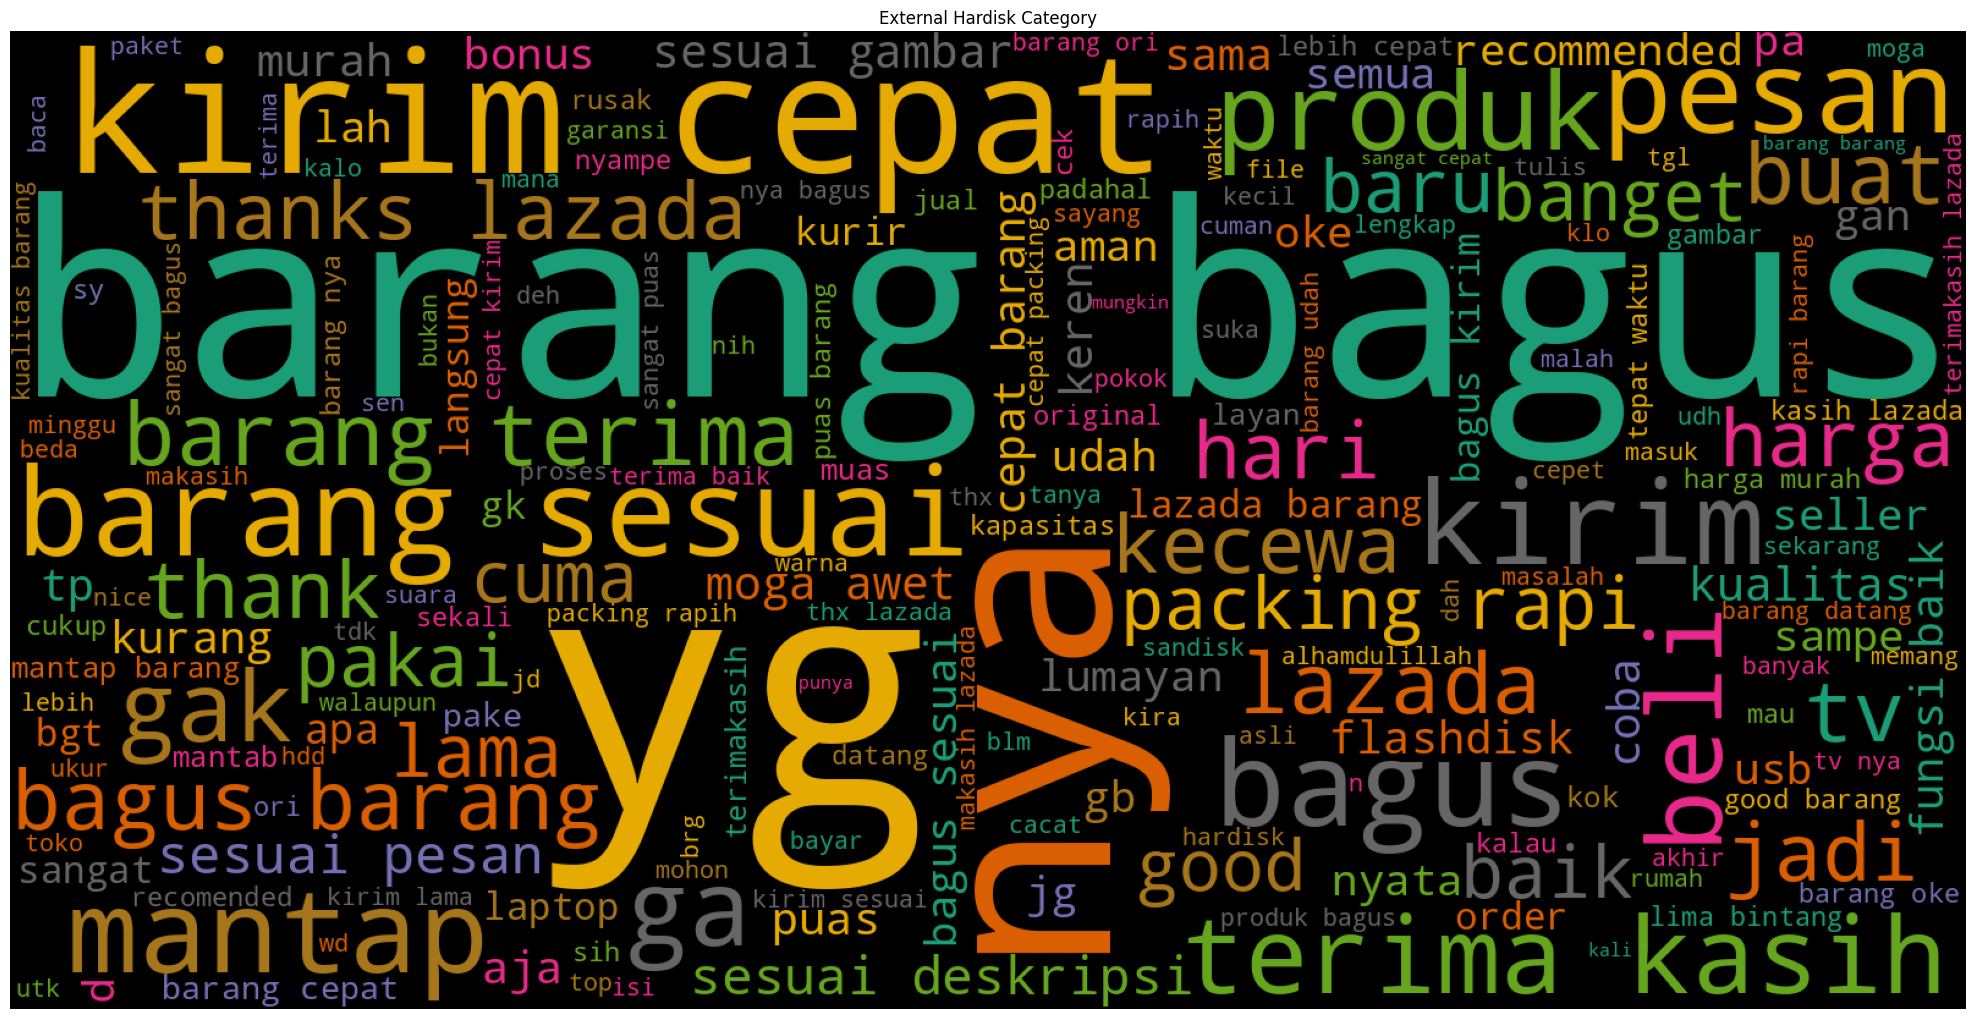

In [36]:
# collection of words in the category buy external hardisk
data_ = new_data_clean.loc[(new_data_clean['category'] == 'beli-harddisk-eksternal')]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# show the wordcloud external hardisk category
wordcloud = WordCloud(background_color='black', mode='RGB', width=1600, height=800, colormap='Dark2').generate(text)
plt.figure(figsize=(20,10))
plt.title('External Hardisk Category')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

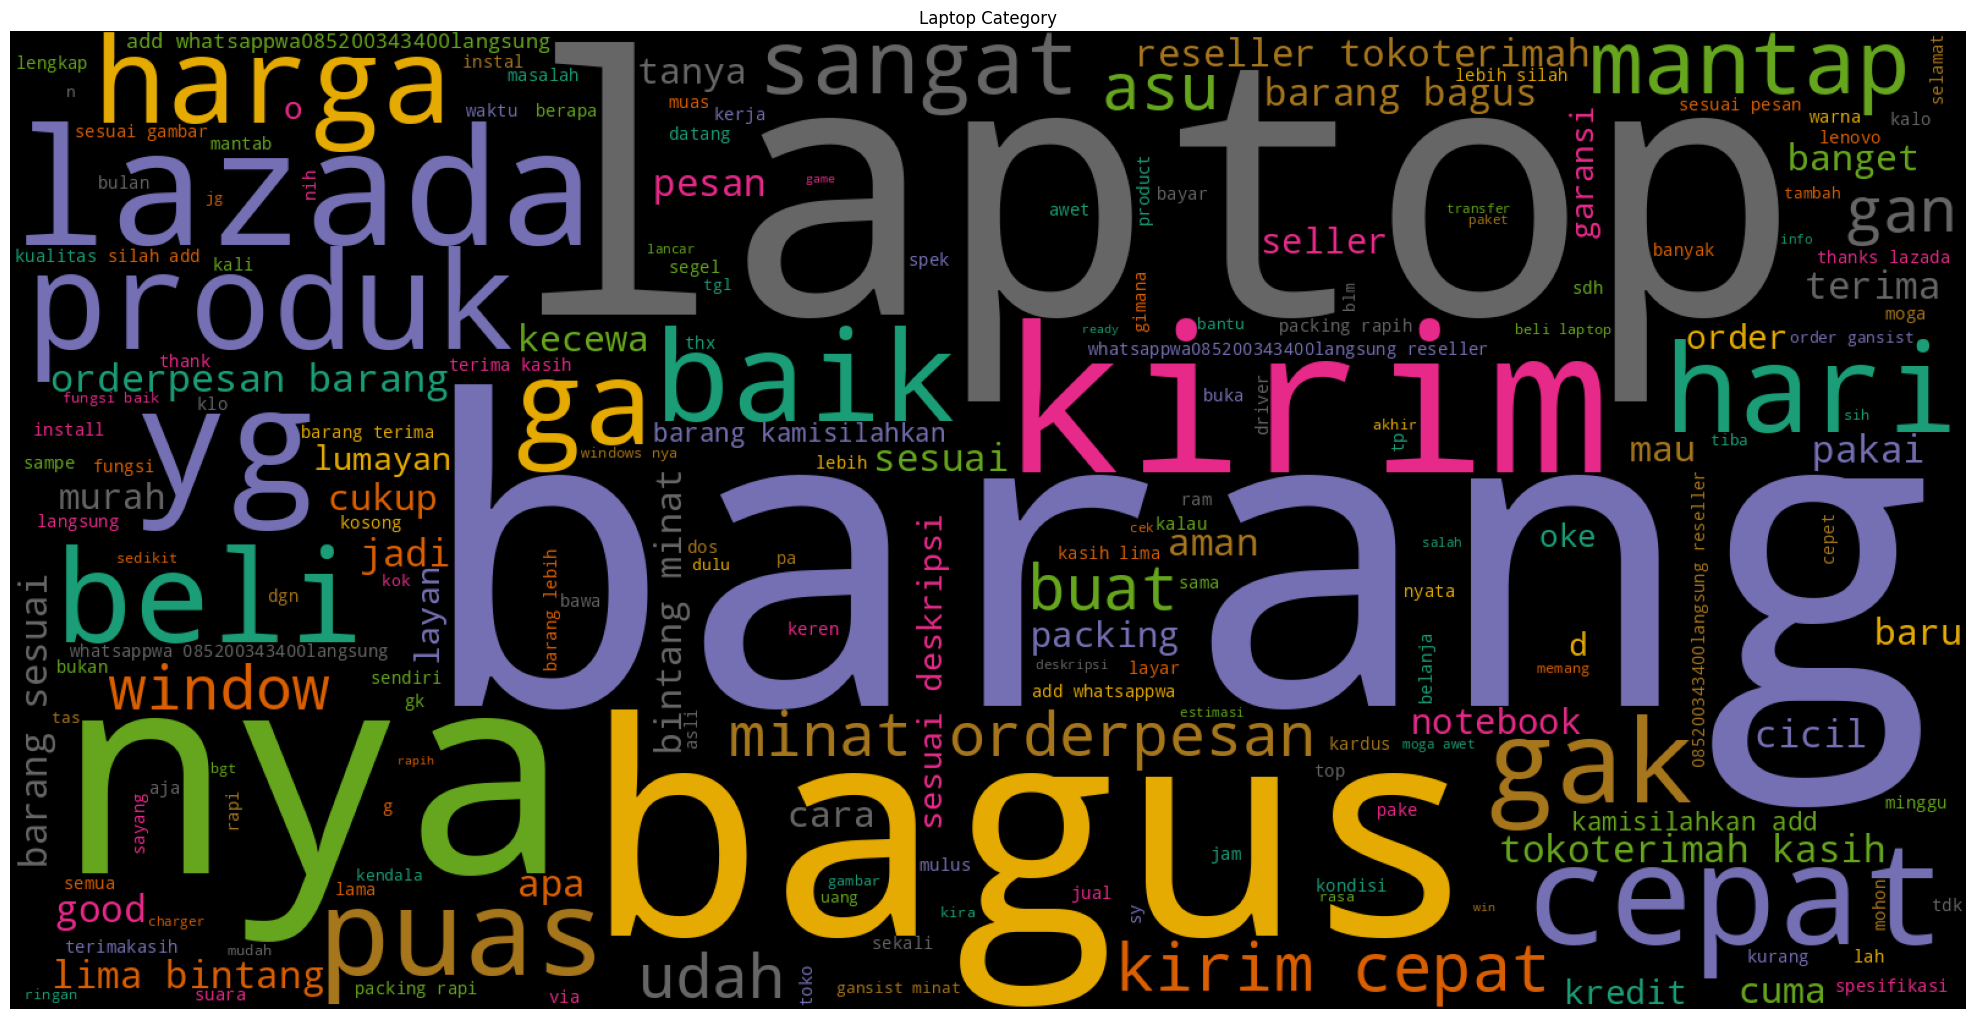

In [37]:
# collection of words in the category buy laptop
data_ = new_data_clean.loc[(new_data_clean['category'] == 'beli-laptop')]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# show the wordcloud laptop category
wordcloud = WordCloud(background_color='black', mode='RGB', width=1600, height=800, colormap='Dark2').generate(text)
plt.figure(figsize=(20,10))
plt.title('Laptop Category')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

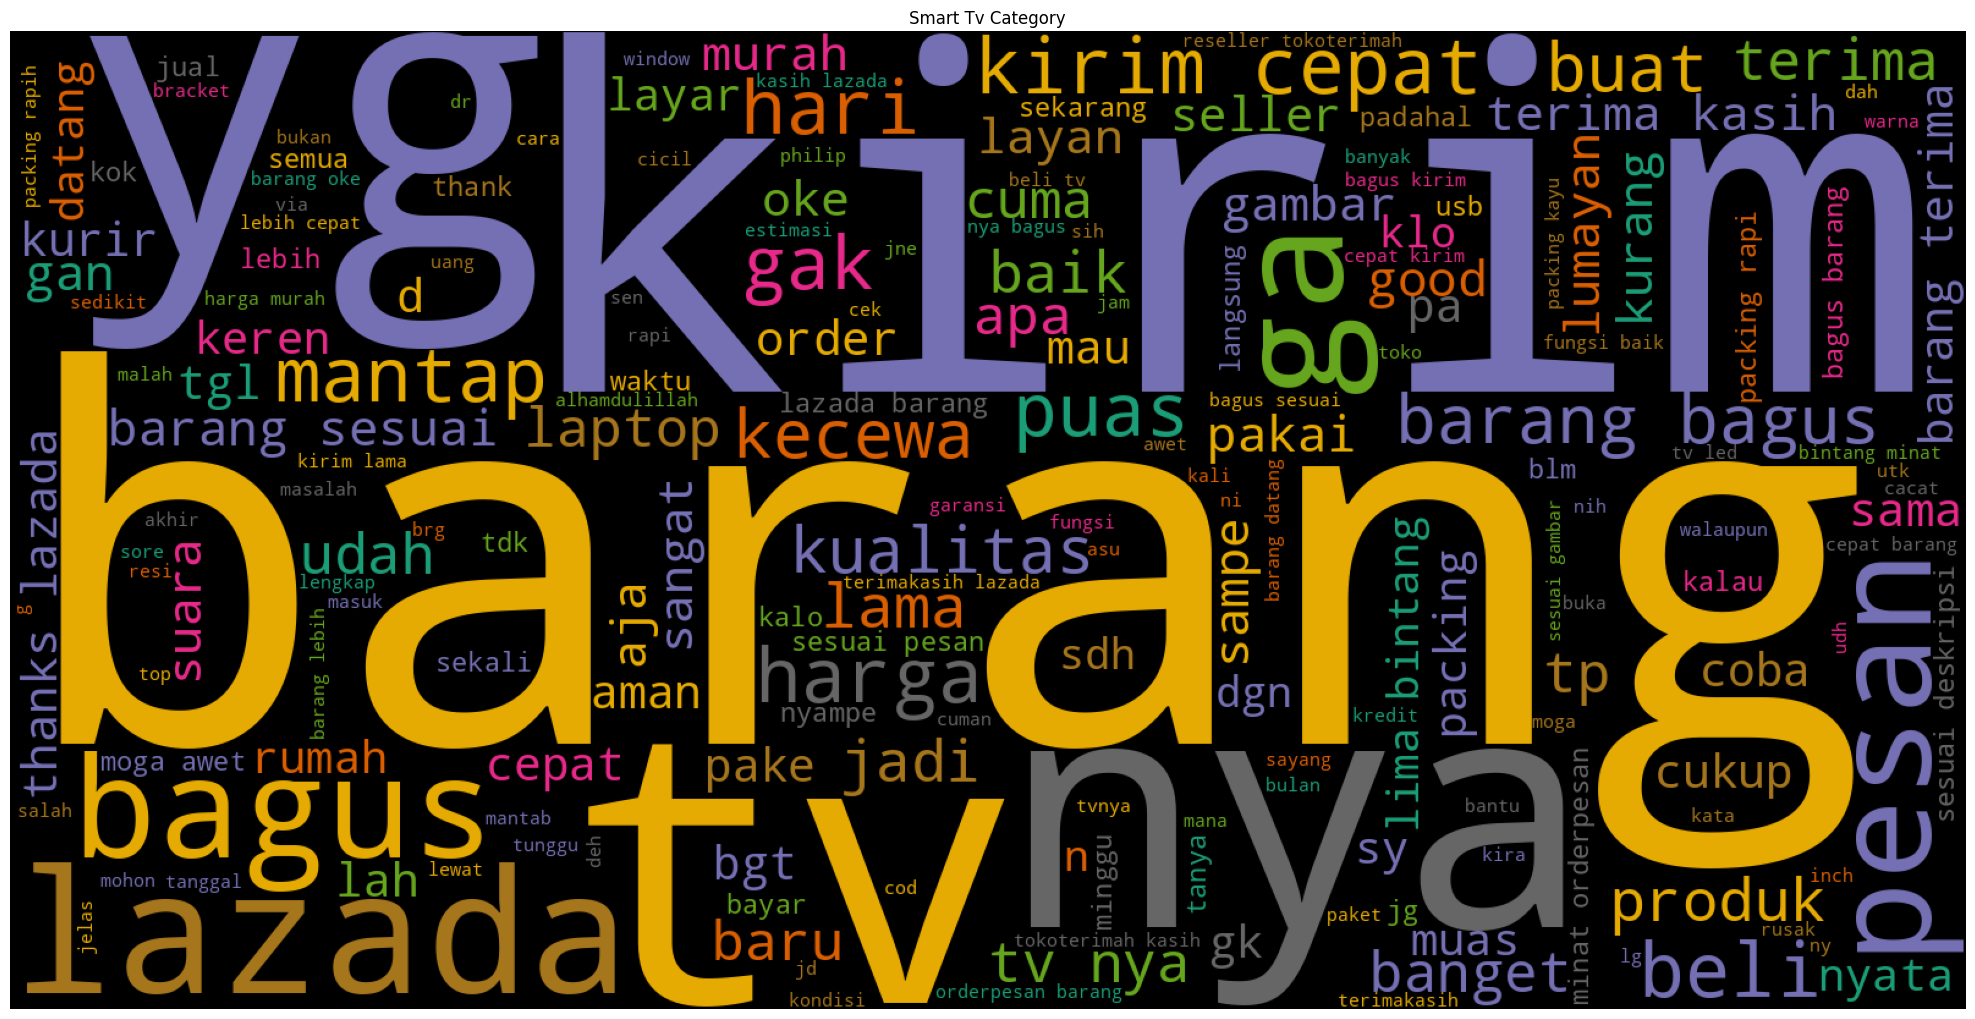

In [38]:
# collection of words in smart tv category
data_ = new_data_clean.loc[(new_data_clean['category'] == "beli-smart-tv")]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# show the wordcloud smart tv category
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('Smart Tv Category')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

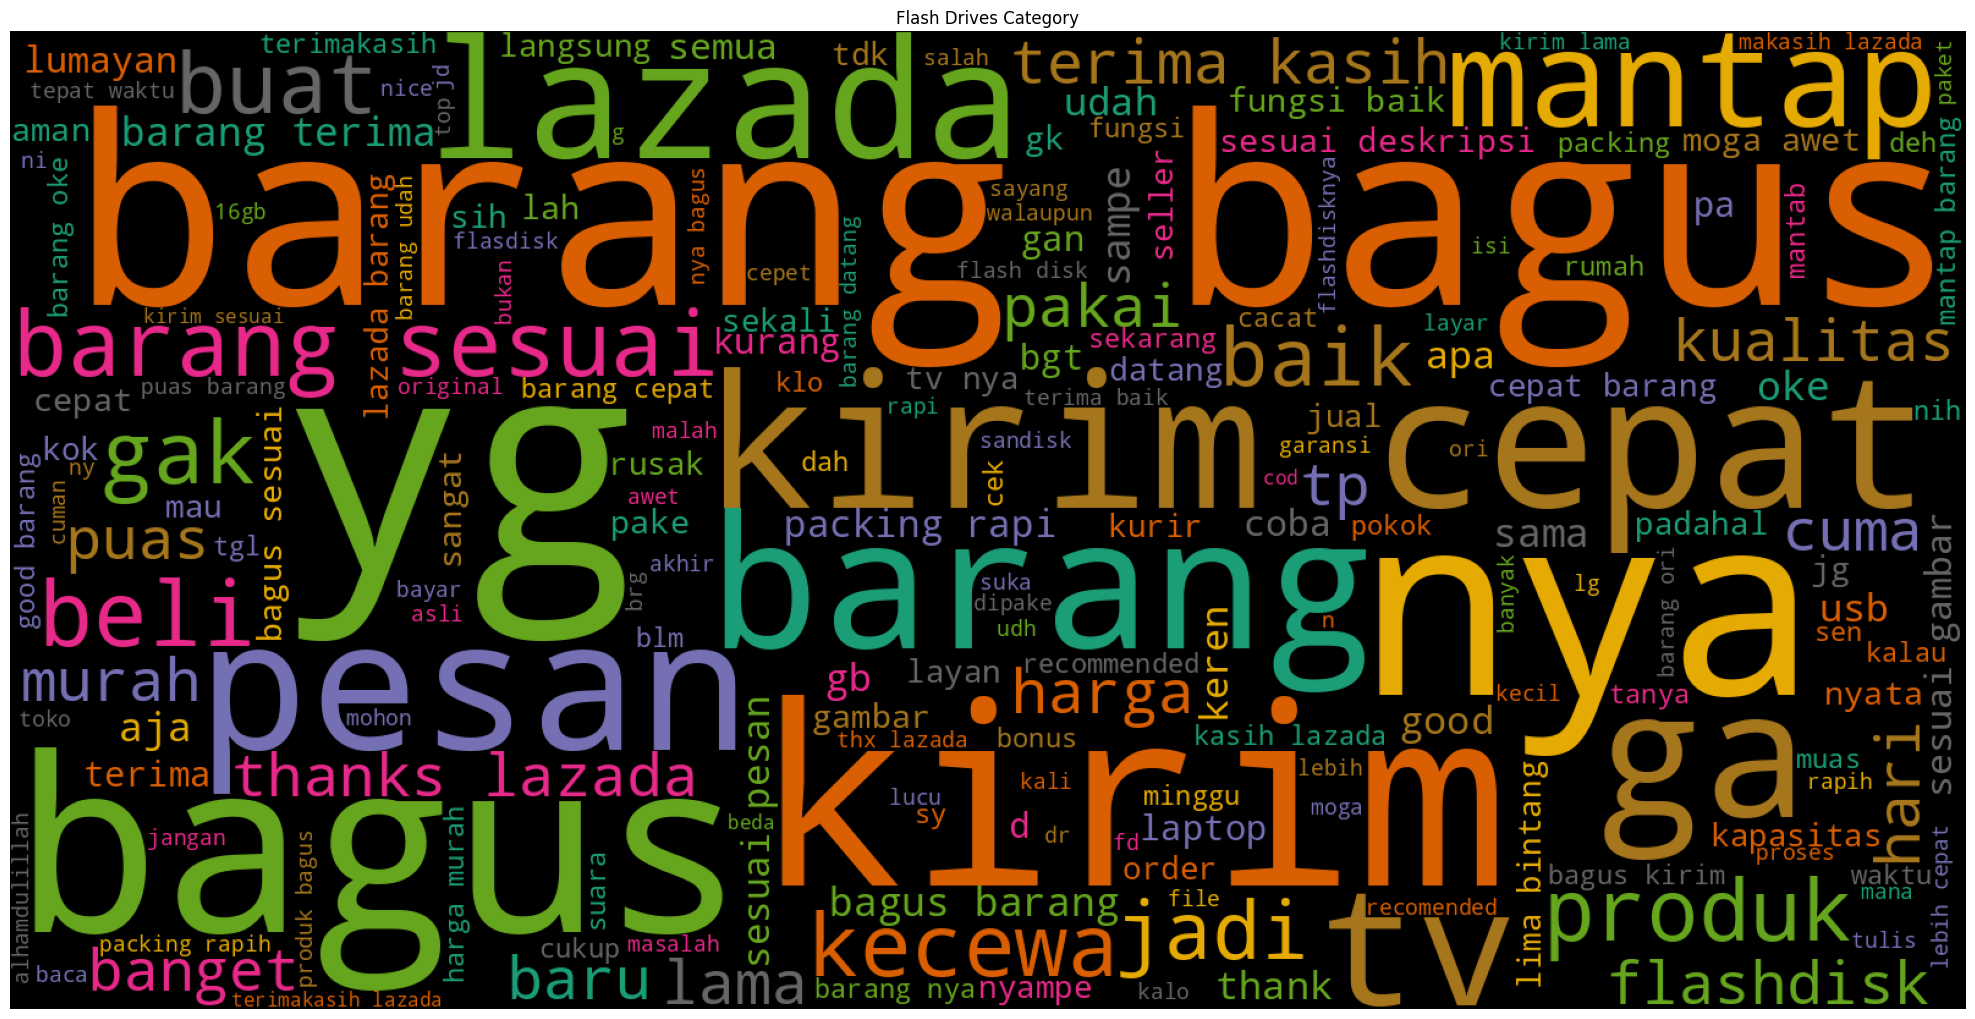

In [39]:
# collection of words in flash drives category
data_ = new_data_clean.loc[(new_data_clean['category'] == "jual-flash-drives")]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# show the wordcloud flash drives category
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('Flash Drives Category')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

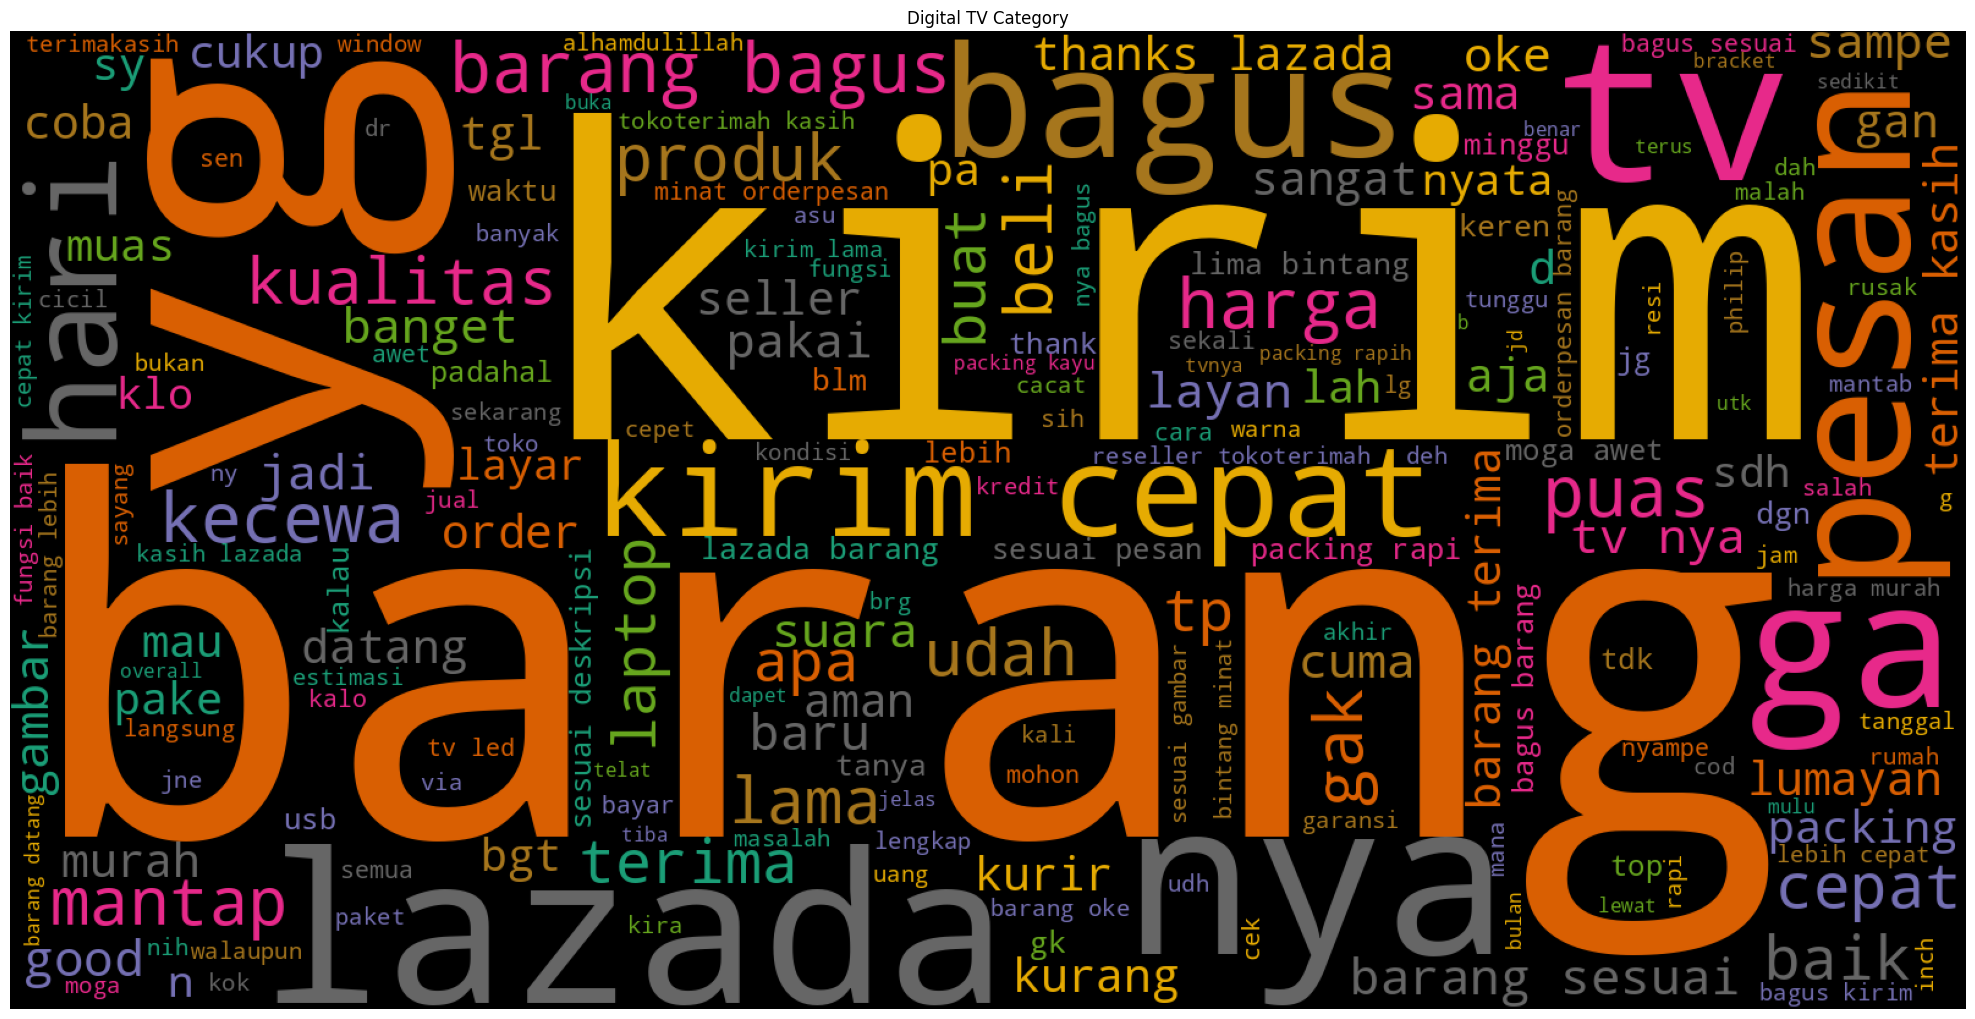

In [40]:
# collection of words in digital tv category
data_ = new_data_clean.loc[(new_data_clean['category'] == "shop-televisi-digital")]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# show the wordcloud digital tv category
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('Digital TV Category')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Label Encoder

In [41]:
# set the rating
set(new_data_clean['rating'])

{1, 2, 3, 4, 5}

In [42]:
# build label function based on rating
def change_label (rating):
  if rating < 3 :
    return('negatif')
  elif rating == 3 :
    return('netral')
  elif rating > 3 :
    return('positif')

In [43]:
# apply the function for a new column label
new_data_clean['label'] = new_data_clean['rating'].apply(lambda x: change_label(x))

# show the data
new_data_clean

category             name  rating  \
0      beli-harddisk-eksternal  Lazada Customer       5   
1      beli-harddisk-eksternal        nurfarida       1   
2      beli-harddisk-eksternal         agung p.       5   
3      beli-harddisk-eksternal     Lazada Guest       1   
4      beli-harddisk-eksternal           Yan M.       5   
...                        ...              ...     ...   
21068    shop-televisi-digital           Ririnn       5   
21069    shop-televisi-digital         Frank S.       1   
21070    shop-televisi-digital    Isharyanto S.       5   
21071    shop-televisi-digital     Saidhusin H.       3   
21072    shop-televisi-digital         Vivan Y.       5   

                                             reviewTitle  \
0            ok mantaaapppp barang sesuai pesanan.. good   
1                                 ada pengirimn ntb bima   
2                              Barang bagus sesuai specs   
3                                    Ini cicil pake apa?   
4                         Beli cash sesuai Harga di atas   
...                                                  ...   
21068                                            Orderan   
21069  Wrong Picture in the Article - I got the wrong...   
21070                                              murah   
21071                                       AKARI LED TV   
21072                                            TOP DAH   

                                           reviewContent  \
0                       okkkkk mantaaaaaaapppp ... goood   
1                                                   bima   
2      Pesan rabu sore,minggu sore sampe,,barang sesu...   
3             Mau tanya ini cicilnya pake apa ya,cc bkn?   
4                  Apakah TV. Tsb. Suda ada anti gores..   
...                                                  ...   
21068                                             Wkwkwk   
21069  seller incapable to keep his product page clea...   
21070               barang bagus dengan harga kompetitif   
21071  Ok.thank lazada Pagi order sore barang nyampe ...   
21072  semua fitur berfungsi,harganya cukup murah. AK...   

                                              reviewJoin  \
0      ok mantaaapppp barang sesuai pesanan.. good ok...   
1                            ada pengirimn ntb bima bima   
2      Barang bagus sesuai specs Pesan rabu sore,ming...   
3      Ini cicil pake apa? Mau tanya ini cicilnya pak...   
4      Beli cash sesuai Harga di atas Apakah TV. Tsb....   
...                                                  ...   
21068                                     Orderan Wkwkwk   
21069  Wrong Picture in the Article - I got the wrong...   
21070         murah barang bagus dengan harga kompetitif   
21071  AKARI LED TV Ok.thank lazada Pagi order sore b...   
21072  TOP DAH semua fitur berfungsi,harganya cukup m...   

                                            review_clean  \
0      ok mantaaapppp barang sesuai pesanan good okkk...   
1                            ada pengirimn ntb bima bima   
2      barang bagus sesuai specs pesan rabu soremingg...   
3      ini cicil pake apa mau tanya ini cicilnya pake...   
4      beli cash sesuai harga di atas apakah tv tsb s...   
...                                                  ...   
21068                                     orderan wkwkwk   
21069  wrong picture in the article  i got the wrong ...   
21070         murah barang bagus dengan harga kompetitif   
21071  akari led tv okthank lazada pagi order sore ba...   
21072  top dah semua fitur berfungsiharganya cukup mu...   

                                             review_stem  \
0      ok mantaaapppp barang sesuai pesan good okkkkk...   
1                            ada pengirimn ntb bima bima   
2      barang bagus sesuai specs pesan rabu soremingg...   
3      ini cicil pake apa mau tanya ini cicil pake ap...   
4      beli cash sesuai harga di atas apakah tv tsb s...   
...                                                  ...   
21068    

In [44]:
# encode the label with fit_transform
new_data_clean['fit_label'] = LabelEncoder().fit_transform(new_data_clean['label'])

# show data
new_data_clean

category             name  rating  \
0      beli-harddisk-eksternal  Lazada Customer       5   
1      beli-harddisk-eksternal        nurfarida       1   
2      beli-harddisk-eksternal         agung p.       5   
3      beli-harddisk-eksternal     Lazada Guest       1   
4      beli-harddisk-eksternal           Yan M.       5   
...                        ...              ...     ...   
21068    shop-televisi-digital           Ririnn       5   
21069    shop-televisi-digital         Frank S.       1   
21070    shop-televisi-digital    Isharyanto S.       5   
21071    shop-televisi-digital     Saidhusin H.       3   
21072    shop-televisi-digital         Vivan Y.       5   

                                             reviewTitle  \
0            ok mantaaapppp barang sesuai pesanan.. good   
1                                 ada pengirimn ntb bima   
2                              Barang bagus sesuai specs   
3                                    Ini cicil pake apa?   
4                         Beli cash sesuai Harga di atas   
...                                                  ...   
21068                                            Orderan   
21069  Wrong Picture in the Article - I got the wrong...   
21070                                              murah   
21071                                       AKARI LED TV   
21072                                            TOP DAH   

                                           reviewContent  \
0                       okkkkk mantaaaaaaapppp ... goood   
1                                                   bima   
2      Pesan rabu sore,minggu sore sampe,,barang sesu...   
3             Mau tanya ini cicilnya pake apa ya,cc bkn?   
4                  Apakah TV. Tsb. Suda ada anti gores..   
...                                                  ...   
21068                                             Wkwkwk   
21069  seller incapable to keep his product page clea...   
21070               barang bagus dengan harga kompetitif   
21071  Ok.thank lazada Pagi order sore barang nyampe ...   
21072  semua fitur berfungsi,harganya cukup murah. AK...   

                                              reviewJoin  \
0      ok mantaaapppp barang sesuai pesanan.. good ok...   
1                            ada pengirimn ntb bima bima   
2      Barang bagus sesuai specs Pesan rabu sore,ming...   
3      Ini cicil pake apa? Mau tanya ini cicilnya pak...   
4      Beli cash sesuai Harga di atas Apakah TV. Tsb....   
...                                                  ...   
21068                                     Orderan Wkwkwk   
21069  Wrong Picture in the Article - I got the wrong...   
21070         murah barang bagus dengan harga kompetitif   
21071  AKARI LED TV Ok.thank lazada Pagi order sore b...   
21072  TOP DAH semua fitur berfungsi,harganya cukup m...   

                                            review_clean  \
0      ok mantaaapppp barang sesuai pesanan good okkk...   
1                            ada pengirimn ntb bima bima   
2      barang bagus sesuai specs pesan rabu soremingg...   
3      ini cicil pake apa mau tanya ini cicilnya pake...   
4      beli cash sesuai harga di atas apakah tv tsb s...   
...                                                  ...   
21068                                     orderan wkwkwk   
21069  wrong picture in the article  i got the wrong ...   
21070         murah barang bagus dengan harga kompetitif   
21071  akari led tv okthank lazada pagi order sore ba...   
21072  top dah semua fitur berfungsiharganya cukup mu...   

                                             review_stem  \
0      ok mantaaapppp barang sesuai pesan good okkkkk...   
1                            ada pengirimn ntb bima bima   
2      barang bagus sesuai specs pesan rabu soremingg...   
3      ini cicil pake apa mau tanya ini cicil pake ap...   
4      beli cash sesuai harga di atas apakah tv tsb s...   
...                                                  ...   
21068    

In [45]:
# show value counts from fit_label
new_data_clean['fit_label'].value_counts()

fit_label
2    15888
0     3565
1     1620
Name: count, dtype: int64

**Manual Encoder**

In [46]:
# Manual Encoder
new_data_clean.sort_values(by=['label'], inplace=True)
new_data_clean['label_id'] = new_data_clean['label'].factorize()[0]
kategori_id_data = new_data_clean[['label', 'label_id']].drop_duplicates().sort_values('label_id')
kategori_to_id = dict(kategori_id_data.values)
id_to_kategori = dict(kategori_id_data[['label_id', 'label']].values)

leng = kategori_id_data.label_id.values
leng = len (leng)

In [47]:
# show new data clean
new_data_clean = new_data_clean.reset_index(drop=True)
new_data_clean

category             name  rating  \
0                  beli-laptop    Musdalifah a.       2   
1      beli-harddisk-eksternal  Lazada Customer       1   
2            jual-flash-drives         Mulya N.       1   
3            jual-flash-drives           Ica s.       1   
4            jual-flash-drives            zuhri       1   
...                        ...              ...     ...   
21068  beli-harddisk-eksternal     Lazada Guest       5   
21069  beli-harddisk-eksternal         Ahmed I.       4   
21070  beli-harddisk-eksternal             Tomi       4   
21071  beli-harddisk-eksternal     Lazada Guest       5   
21072    shop-televisi-digital         Vivan Y.       5   

                             reviewTitle  \
0                       Pengajuan kredit   
1      barang sudah sampe sesuai pesanan   
2                                makelar   
3                          Sangat kecewa   
4                                pnsaran   
...                                  ...   
21068                       No tipu tipu   
21069                                Oke   
21070                       Barang Bagus   
21071                         Satisfied,   
21072                            TOP DAH   

                                           reviewContent  \
0                          Bisa kredit dg home kredit g?   
1                      pengiriman cepat terimasih lazada   
2               terlalu murah harganya turunin jadi 100k   
3      Saya pesan pakek jasa gojek seharusnya sampai ...   
4      gmn yg udh make full ngk 64gb...kok gue jdi ra...   
...                                                  ...   
21068  Recommended gan,  Barangnya dah sampe , bagus ...   
21069  Sampek nih barang,  Packingan dalam box aman u...   
21070  Barang baru tiba gan. untuk pengiriman agak la...   
21071  Look so good ..delivery is sofast ,,and low price   
21072  semua fitur berfungsi,harganya cukup murah. AK...   

                                              reviewJoin  \
0         Pengajuan kredit Bisa kredit dg home kredit g?   
1      barang sudah sampe sesuai pesanan pengiriman c...   
2       makelar terlalu murah harganya turunin jadi 100k   
3      Sangat kecewa Saya pesan pakek jasa gojek seha...   
4      pnsaran gmn yg udh make full ngk 64gb...kok gu...   
...                                                  ...   
21068  No tipu tipu Recommended gan,  Barangnya dah s...   
21069  Oke Sampek nih barang,  Packingan dalam box am...   
21070  Barang Bagus Barang baru tiba gan. untuk pengi...   
21071  Satisfied, Look so good ..delivery is sofast ,...   
21072  TOP DAH semua fitur berfungsi,harganya cukup m...   

                                            review_clean  \
0          pengajuan kredit bisa kredit dg home kredit g   
1      barang sudah sampe sesuai pesanan pengiriman c...   
2       makelar terlalu murah harganya turunin jadi 100k   
3      sangat kecewa saya pesan pakek jasa gojek seha...   
4      pnsaran gmn yg udh make full ngk 64gbkok gue j...   
...                                                  ...   
21068  no tipu tipu recommended gan  barangnya dah sa...   
21069  oke sampek nih barang  packingan dalam box ama...   
21070  barang bagus barang baru tiba gan untuk pengir...   
21071  satisfied look so good delivery is sofast and ...   
21072  top dah semua fitur berfungsiharganya cukup mu...   

                                             review_stem  \
0                aju kredit bisa kredit dg home kredit g   
1      barang sudah sampe sesuai pesan kirim cepat te...   
2          makelar terlalu murah harga turunin jadi 100k   
3      sangat kecewa saya pesan pakek jasa gojek haru...   
4      pnsaran gmn yg udh make full ngk 64gbkok gue j...   
...                                                  ...   
21068  no tipu tipu recommended gan barang dah sampe ...   
21069  oke sampek nih barang packingan dalam box aman...   
21070  barang bagus barang baru tiba gan untuk kirim ...   
21071  satisfied look

In [48]:
# show value counts from two types encoder method
new_data_clean[['fit_label', 'label_id']].value_counts()

fit_label  label_id
2          2           15888
0          0            3565
1          1            1620
Name: count, dtype: int64

# Split data

In [49]:
# train test split
train, test = train_test_split(new_data_clean, test_size=0.25, random_state=42)

In [50]:
# show the five rows train data
train.head()

category     name  rating             reviewTitle  \
2087   beli-harddisk-eksternal   Aam A.       1  Flashdisk Tosiba 64 GB   
19305  beli-harddisk-eksternal  Jemi S.       5            barang bagus   
15205  beli-harddisk-eksternal  Sifa F.       5                 Perfect   
11228        jual-flash-drives     tari       5                   bagus   
3997         jual-flash-drives   candra       3                good usb   

                                           reviewContent  \
2087   sangat buruk, produk tidak dapat di.pakai, beg...   
19305  barang sudah saya terima. saya puas dengan bar...   
15205  Baguuuusss. Proses cepat, packaging rapi, berf...   
11228  baguss. tpi pas dipake langsung ada virusnyaaa...   
3997                   usb desain klasik..kualitas oke !   

                                              reviewJoin  \
2087   Flashdisk Tosiba 64 GB sangat buruk, produk ti...   
19305  barang bagus barang sudah saya terima. saya pu...   
15205  Perfect Baguuuusss. Proses cepat, packaging ra...   
11228  bagus baguss. tpi pas dipake langsung ada viru...   
3997          good usb usb desain klasik..kualitas oke !   

                                            review_clean  \
2087   flashdisk tosiba 64 gb sangat buruk produk tid...   
19305  barang bagus barang sudah saya terima saya pua...   
15205  perfect baguuuusss proses cepat packaging rapi...   
11228  bagus baguss tpi pas dipake langsung ada virus...   
3997             good usb usb desain klasikkualitas oke    

                                             review_stem  \
2087   flashdisk tosiba 64 gb sangat buruk produk tid...   
19305  barang bagus barang sudah saya terima saya pua...   
15205  perfect baguuuusss proses cepat packaging rapi...   
11228  bagus baguss tpi pas dipake langsung ada virus...   
3997              good usb usb desain klasikkualitas oke   

                                     review_stp_sastrawi  \
2087   flashdisk tosiba 64 gb sangat buruk produk   p...   
19305  barang bagus barang   terima  puas  barang fla...   
15205  perfect baguuuusss proses cepat packaging rapi...   
11228  bagus baguss tpi pas dipake langsung  virusnya...   
3997              good usb usb desain klasikkualitas oke   

                                         review_stp_nltk    label  fit_label  \
2087   flashdisk tosiba 64 gb sangat buruk produk pak...  negatif          0   
19305   barang bagus barang terima puas barang flashdisk  positif          2   
15205  perfect baguuuusss proses cepat packaging rapi...  positif          2   
11228  bagus baguss tpi pas dipake langsung virusnyaa...  positif          2   
3997              good usb usb desain klasikkualitas oke   netral          1   

       label_id  
2087          0  
19305         2  
15205         2  
11228         2  
3997          1

In [51]:
# show the five rows test data
test.head()

category        name  rating  \
10796        jual-flash-drives        budi       5   
16442  beli-harddisk-eksternal  M.zarwandi       5   
16624              beli-laptop    Ahmad H.       4   
12833  beli-harddisk-eksternal   andriyana       5   
14844  beli-harddisk-eksternal  Maulidyani       5   

                                  reviewTitle  \
10796                                  mantap   
16442                  WD eksternal Hard disk   
16624                     Netbook Asus e202sa   
12833                            Barang bagus   
14844  Harddisknya bagus, pengirimannya cepat   

                                           reviewContent  \
10796                              barang sesuai pesanan   
16442  saya terima pesanan tepat waktu, sesuai dengan...   
16624  Barang oke,packing aman, cuma sayang agak lama...   
12833          Barang bagus harga murah pengiriman cepat   
14844  Harddisknya bagus, pengirimannya cepat, kemari...   

                                              reviewJoin  \
10796                       mantap barang sesuai pesanan   
16442  WD eksternal Hard disk saya terima pesanan tep...   
16624  Netbook Asus e202sa Barang oke,packing aman, c...   
12833  Barang bagus Barang bagus harga murah pengirim...   
14844  Harddisknya bagus, pengirimannya cepat Harddis...   

                                            review_clean  \
10796                       mantap barang sesuai pesanan   
16442  wd eksternal hard disk saya terima pesanan tep...   
16624  netbook asus e202sa barang okepacking aman cum...   
12833  barang bagus barang bagus harga murah pengirim...   
14844  harddisknya bagus pengirimannya cepat harddisk...   

                                             review_stem  \
10796                         mantap barang sesuai pesan   
16442  wd eksternal hard disk saya terima pesan tepat...   
16624  netbook asus e202sa barang okepacking aman cum...   
12833  barang bagus barang bagus harga murah kirim cepat   
14844  harddisknya bagus kirim cepat harddisknya bagu...   

                                     review_stp_sastrawi  \
10796                         mantap barang sesuai pesan   
16442  wd eksternal hard disk  terima pesan tepat wak...   
16624  netbook asus e202sa barang okepacking aman cum...   
12833  barang bagus barang bagus harga murah kirim cepat   
14844  harddisknya bagus kirim cepat harddisknya bagu...   

                                         review_stp_nltk    label  fit_label  \
10796                         mantap barang sesuai pesan  positif          2   
16442  wd eksternal hard disk terima pesan tepat wakt...  positif          2   
16624  netbook asus e202sa barang okepacking aman cum...  positif          2   
12833  barang bagus barang bagus harga murah kirim cepat  positif          2   
14844  harddisknya bagus kirim cepat harddisknya bagu...  positif          2   

       label_id  
10796         2  
16442         2  
16624         2  
12833         2  
14844         2

# Feature Engineering & Modeling

Modeling without stopwords

In [52]:
# initialization vectorization object
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train['review_stem'])
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# show list label
y_list = list(train['fit_label'])
Y_train = np.array(y_list)

In [53]:
# view train and label data
print('train data : ', X_train_tfidf.shape)
print('train label : ', Y_train.shape)

train data :  (15804, 10660)
train label :  (15804,)


In [54]:
# start time
start_time = datetime.now()

# Modelling with SVC
svc = SVC(kernel='linear')
svc.fit(X_train_tfidf, Y_train)

end_time = datetime.now()
print('Duration : {}'.format(end_time - start_time))

Duration : 0:00:38.006227


In [55]:
# Convert text data into numeric in test data
a = count_vect.transform(test['review_stem'])
X_test = tfidf_transformer.transform(a).toarray()
print(X_test.shape)

Y_test = list(test['fit_label'])

(5269, 10660)


In [56]:
# Predict model with Support Vector Classification
predictions_svm = svc.predict(X_test)

# Print Accuracy SVM score
print('SVM Accuracy Score : ', accuracy_score(predictions_svm, Y_test)*100, '%')

SVM Accuracy Score :  91.7251850446005 %


Modeling with stopwords

In [57]:
# x_train
count_vect = CountVectorizer()
X_train_stp_counts = count_vect.fit_transform(train['review_stp_nltk'])
tfidf_transformer = TfidfTransformer()
X_train_stp_tfidf = tfidf_transformer.fit_transform(X_train_stp_counts)

# y_train
y_list = list(train['fit_label'])
Y_train_stp = np.array(y_list)

In [58]:
# View a train and test data shape
print('train data : ', X_train_stp_tfidf.shape)
print('train label : ', Y_train_stp.shape)

train data :  (15804, 10561)
train label :  (15804,)


In [59]:
# Build a SVC model
start_time = datetime.now()

svc_stp = SVC(kernel='linear')
svc_stp.fit(X_train_stp_tfidf, Y_train_stp)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:32.815931


In [60]:
# Convert text data into numeric in test data
a = count_vect.transform(test['review_stp_nltk'])
X_test_stp = tfidf_transformer.transform(a).toarray()
print (X_test_stp.shape)

Y_test_stp = list(test['fit_label'])

(5269, 10561)


In [61]:
# Predict model with Support Vector Classification
predictions_svc_stp = svc_stp.predict(X_test_stp)

# Print Accuracy SVC score
print("SVC Accuracy Score : ",accuracy_score(predictions_svc_stp, Y_test_stp)*100,'%')

SVC Accuracy Score :  91.57335357752893 %


# Predict using new data

In [62]:
# new dataframe predict
text_predict = ['bagus-bagus aja sih', 'boleh lah ya', 'apaan nih barang ga sesuai banget']
df_predict = pd.DataFrame(text_predict, columns = ['text'])
df_predict

text
0                bagus-bagus aja sih
1                       boleh lah ya
2  apaan nih barang ga sesuai banget

In [63]:
# Following the text preprocess in data
df_predict['text_clean'] = df_predict['text'].apply(lambda x: str(x).lower())
df_predict['text_clean'] = df_predict['text_clean'].apply(lambda x: data_cleaning(x))
df_predict['text_stem'] = df_predict['text_clean'].apply(lambda x: stemmer.stem(x))
df_predict['text_stp_sastrawi'] = df_predict['text_stem'].apply(lambda x: ' '.join(stopword.remove(x) for x in x.split() ))
df_predict['text_stp_nltk'] = df_predict['text_stem'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))

In [64]:
# show the result of data
df_predict

text                         text_clean  \
0                bagus-bagus aja sih                 bagusbagus aja sih   
1                       boleh lah ya                       boleh lah ya   
2  apaan nih barang ga sesuai banget  apaan nih barang ga sesuai banget   

                         text_stem                text_stp_sastrawi  \
0               bagusbagus aja sih               bagusbagus aja sih   
1                     boleh lah ya                             lah    
2  apa nih barang ga sesuai banget  apa nih barang ga sesuai banget   

                     text_stp_nltk  
0               bagusbagus aja sih  
1                              lah  
2  apa nih barang ga sesuai banget

In [65]:
# build feature engineering function
def predict (i):
    a = count_vect.transform([i])
    X_coba = tfidf_transformer.transform(a).toarray()
    y_pred = svc_stp.predict(X_coba)
    y_label = id_to_kategori[y_pred[0]]
    return (y_label)

def predict_stp (i):
    a = count_vect.transform([i])
    X_coba = tfidf_transformer.transform(a).toarray()
    y_pred = svc_stp.predict(X_coba)
    y_label = id_to_kategori[y_pred[0]]
    return (y_label)

In [66]:
# apply funciton in new column
df_predict['predict_label'] = df_predict['text_stem'].apply(lambda x : predict(x))
df_predict['predict_label_stp'] = df_predict['text_stem'].apply(lambda x : predict_stp(x))

In [67]:
# show prediction results
df_predict[['text','predict_label','predict_label_stp']]

text predict_label predict_label_stp
0                bagus-bagus aja sih       negatif           negatif
1                       boleh lah ya       positif           positif
2  apaan nih barang ga sesuai banget       positif           positif